In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import visualization as vis

pd.set_option('display.max_columns', None)


In [52]:
df = pd.read_csv('files/data-hotel.csv', index_col=0)

In [53]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,courtesy,arrival_date
0,Resort Hotel,False,342,27,0,0,2,0,0,BB,Portugal,Undefined,Direct,False,0,0,C,C,3,Undefined,0,Transient,0.0,0,0,Check-Out,2015-07-01,True,2015-7-1
1,Resort Hotel,False,737,27,0,0,2,0,0,BB,Undefined,Undefined,Direct,False,0,0,Undefined,C,4,Undefined,0,Transient,0.0,0,0,Check-Out,2015-07-01,True,2015-7-1
2,Resort Hotel,False,7,27,0,1,1,0,0,BB,United Kingdom,Undefined,Direct,False,0,0,A,C,0,Undefined,0,Transient,75.0,0,0,Check-Out,2015-07-02,False,2015-7-1
3,Resort Hotel,False,13,27,0,1,1,0,0,BB,United Kingdom,Corporate,Corporate,False,0,0,A,A,0,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,False,2015-7-1
4,Resort Hotel,False,14,28,0,2,2,0,0,BB,Undefined,Online TA,TA/TO,False,0,0,A,A,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,False,2015-7-1


In [54]:
df_canceladas = df[df['is_canceled'] == True]

In [55]:
df_canceladas

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,courtesy,arrival_date
8,Resort Hotel,True,85,27,0,3,2,0,0,BB,Portugal,Undefined,Undefined,False,0,0,A,A,0,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,False,2015-7-1
9,Resort Hotel,True,75,27,0,3,2,0,0,HB,Undefined,Undefined,TA/TO,False,0,0,D,D,0,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,False,2015-7-1
10,Resort Hotel,True,23,27,0,4,2,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,E,E,0,240.0,0,Undefined,123.0,0,0,Canceled,2015-06-23,False,2015-7-1
27,Resort Hotel,True,60,27,2,5,2,0,0,BB,Portugal,Undefined,TA/TO,False,0,0,Undefined,E,0,240.0,0,Undefined,107.0,0,2,Canceled,2015-05-11,False,2015-7-1
32,Resort Hotel,True,96,28,2,8,2,0,0,BB,Portugal,Direct,Direct,False,0,0,E,E,0,Undefined,0,Transient,108.3,0,2,Canceled,2015-05-29,False,2015-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,True,132,17,0,0,0,0,0,BB,France,Online TA,TA/TO,False,0,0,D,K,1,9.0,0,Transient,0.0,0,3,Canceled,2016-4-25,True,2016-4-25
111355,City Hotel,True,4,23,1,0,1,0,0,BB,Undefined,Undefined,Corporate,True,0,4,Undefined,A,0,Undefined,0,Transient,65.0,0,0,Canceled,2017-05-06,False,2017-6-5
111924,City Hotel,True,7,22,0,1,57,0,0,BB,Portugal,Undefined,Corporate,True,0,1,A,A,0,Undefined,0,Undefined,65.0,0,0,Canceled,2017-05-31,False,2017-5-31
111925,City Hotel,True,6,29,1,0,52,0,0,BB,Undefined,Corporate,Corporate,True,1,1,A,D,0,Undefined,0,Transient,65.0,0,0,No-Show,2017-07-17,False,2017-7-17


- Relación entre canceladas y tipo de canal de distribuciónn. 
- Relación entre canceladas y customer_type
- Relación entre cancelada, lead_time, y fecha de reserva 


In [56]:
columnas_numericas = []
columnas_objeto = []

for columna in df_canceladas.columns:
  tipo_dato = df[columna].dtype
  if pd.api.types.is_numeric_dtype(tipo_dato):
    columnas_numericas.append(columna)
  else:
    columnas_objeto.append(columna)



In [57]:
df_numericas = df_canceladas[columnas_numericas]

In [61]:
df_numericas.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,courtesy
8,True,85,27,0,3,2,0,0,False,0,0,0,0,82.0,0,1,False
9,True,75,27,0,3,2,0,0,False,0,0,0,0,105.5,0,0,False
10,True,23,27,0,4,2,0,0,False,0,0,0,0,123.0,0,0,False
27,True,60,27,2,5,2,0,0,False,0,0,0,0,107.0,0,2,False
32,True,96,28,2,8,2,0,0,False,0,0,0,0,108.3,0,2,False


In [71]:
df_numericas.dtypes

is_canceled                          bool
lead_time                           int64
arrival_date_week_number            int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                    bool
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
courtesy                             bool
dtype: object

In [58]:
df_objetos = df_canceladas[columnas_objeto]

In [59]:
def analizar_relacion_columnas(df, columna1, columna2, tipo_grafica="dispersion"):


  if tipo_grafica not in ["dispersion", "histograma", "caja"]:
    raise ValueError("Tipo de gráfica no válido. Debe ser 'dispersion', 'histograma' o 'caja'.")

  
  if not pd.api.types.is_numeric_dtype(df[columna1].dtype) or not pd.api.types.is_numeric_dtype(df[columna2].dtype):
    raise TypeError("Las columnas deben ser numéricas.")

  
  fig, ax = plt.subplots(figsize=(8, 6))

  # Generamos la gráfica según el tipo especificado
  if tipo_grafica == "dispersion":
    ax.scatter(df[columna1], df[columna2])
    ax.set_xlabel(columna1)
    ax.set_ylabel(columna2)
    ax.set_title(f"Relación entre {columna1} y {columna2}")
  elif tipo_grafica == "histograma":
    ax.hist(df[columna1], label=columna1)
    ax.hist(df[columna2], label=columna2)
    ax.set_xlabel("Valores")
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Distribución de {columna1} y {columna2}")
    ax.legend()
  elif tipo_grafica == "caja":
    ax.boxplot([df[columna1], df[columna2]], labels=[columna1, columna2], notch=True)
    ax.set_xlabel("Columna")
    ax.set_ylabel("Valores")
    ax.set_title(f"Distribución por caja de {columna1} y {columna2}")

  # Mostramos la gráfica
  plt.tight_layout()
  plt.show()



<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/z0/ptwngvg97wndky1th_f_rz8r0000gp/T/ipykernel_2337/417799236.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if columna.types is 'bool':


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

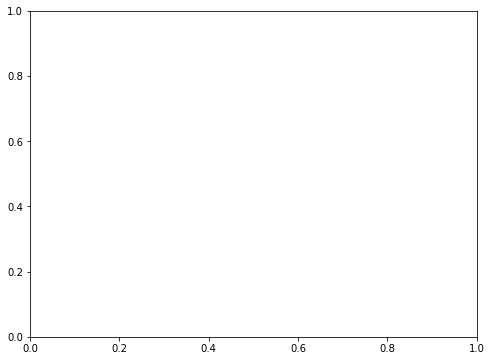

In [75]:
for columna in df_numericas.columns: 
    columna1 = "is_canceled"
    if columna == columna1:
        pass
    else:
        if columna.types is 'bool':
            pass
        else: 
            columna2 = columna
        print(columna2)
    analizar_relacion_columnas(df_numericas,columna1,columna2,tipo_grafica="caja")